## Titanic Survival Analysis Using Pandas

- A hands-on project on data cleaning, exploration, and visualization using the Titanic dataset

### Dataset:
Use the Titanic dataset, available in the seaborn library or Kaggle Titanic dataset.

**Features include:**
- `PassengerId:` Unique identifier for each passenger.
- `Survived:` Survival status (0 = No, 1 = Yes).
- `Pclass:` Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name:` Passenger name.
- `Sex:` Gender.
- `Age:` Age of passenger.
- `SibSp:` Number of siblings/spouses aboard.
- `Parch:` Number of parents/children aboard.
- `Fare:` Ticket fare.
- `Embarked:` Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1. Load Titanic dataset from seaborn**

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.to_csv('titanic.csv')

In [6]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**2. Understand the Dataset**
- Explore the structure and key details about the dataset.

In [7]:
# Check dataset info
print(data.info())

# Check for null values
# print(data.isnull().sum())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

**3. Data Cleaning**

In [8]:
# Drop columns with too many missing values
data.drop(columns=['deck'], inplace=True)

In [9]:
# Fill missing 'age' with median
data['age'].fillna(data['age'].median(), inplace=True)

In [10]:
# Fill missing 'embarked' with most frequent value
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [11]:
# Fill missing 'embark_town' with mode
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)


In [12]:
# Verify
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

**4. Descriptive Analysis**

In [14]:
# Count of survivors vs non-survivors
print("Survival Counts:\n", data['survived'].value_counts())

Survival Counts:
 survived
0    549
1    342
Name: count, dtype: int64


In [15]:
# Survival rate by gender
print("\nSurvival Rate by Gender:\n", data.groupby('sex')['survived'].mean())


Survival Rate by Gender:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [16]:
# Survival rate by class
print("\nSurvival Rate by Class:\n", data.groupby('pclass')['survived'].mean())


Survival Rate by Class:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [17]:
# Crosstab of gender vs class survival
pd.crosstab(data['sex'], data['pclass'], values=data['survived'], aggfunc='mean')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**5. Data Visualization (with Pandas)**

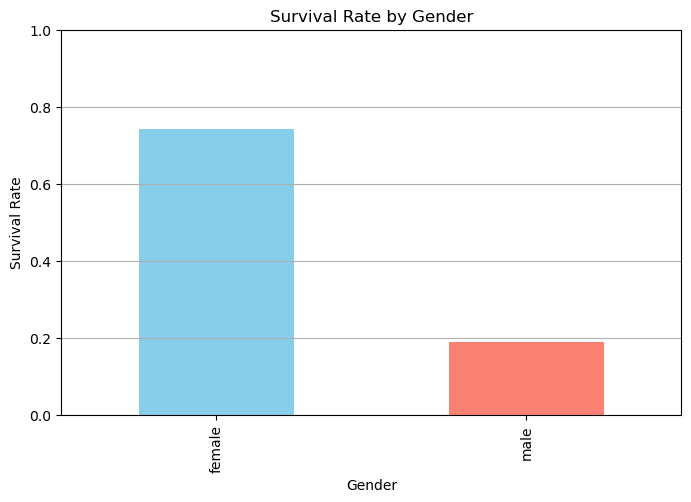

In [ ]:
# Bar plot: Survival Rate by Gender
data.groupby('sex')['survived'].mean().plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 5))

# plt.title('Survival Rate by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Survival Rate')
# plt.ylim(0, 1)
# plt.grid(axis='y')
# plt.show()

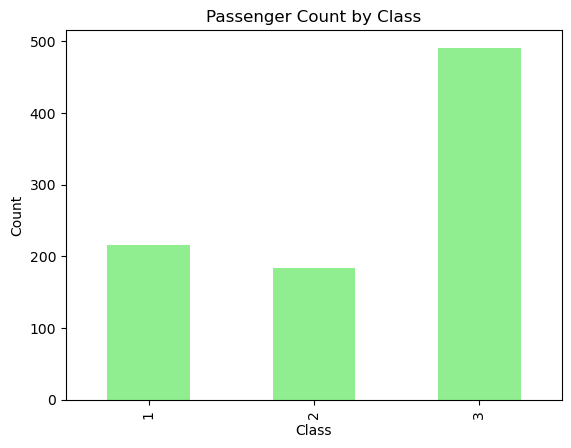

In [23]:
# Countplot using pandas
data['pclass'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

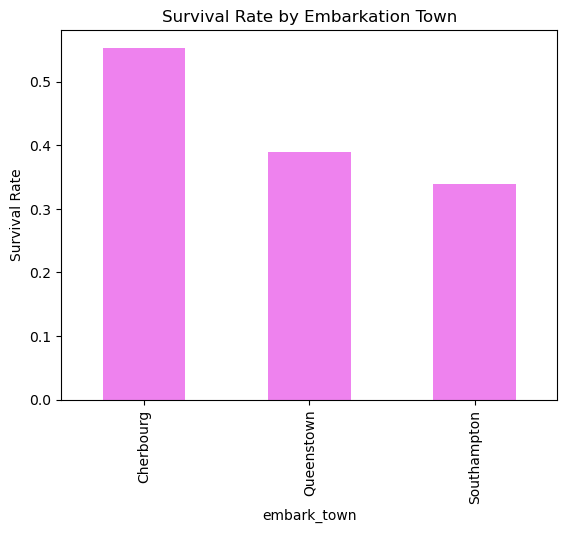

In [24]:
# Survival rate by embarkation town
data.groupby('embark_town')['survived'].mean().plot(kind='bar', color='violet')
plt.title('Survival Rate by Embarkation Town')
plt.ylabel('Survival Rate')
plt.show()

---
__Thank You__